In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2_flux_20180101_20211231.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10','2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
newdata = data.assign_coords(time = time_values)
newdata

<xarray.Dataset>
Dimensions:   (time: 48, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-11' '2021-12'
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2_flux_20180101_20211231
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-12-12 10:34 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [5]:
new_CO2_flux = (newdata['CO2_flux'] * area).where(tmask.isel(depth = 0)).sum(axis = 2).sum(axis = 1) / area.where(tmask.isel(depth = 0)).sum(axis = 0).sum(axis = 0)
new_CO2_flux 

<xarray.DataArray (time: 48)>
array([-1.78675855e-04, -7.27475968e-05, -3.35423103e-06,  5.30597173e-06,
        1.82690250e-05,  1.68330257e-05,  3.77776201e-06, -1.49086260e-05,
       -3.96931479e-05, -8.51496840e-05, -1.61363684e-04, -2.62381793e-04,
       -1.12483954e-04, -9.42166578e-05, -2.56525066e-06,  3.44629531e-05,
        3.21793747e-05,  1.28295100e-05, -8.46740847e-06, -1.78177571e-05,
       -7.11279561e-05, -1.16865068e-04, -1.22597755e-04, -1.46565680e-04,
       -2.42616310e-04, -6.05829459e-05, -1.36485219e-05,  2.55125267e-05,
        2.73734980e-05,  1.30947218e-05, -1.32291412e-06, -2.07023047e-05,
       -4.89558879e-05, -1.11364050e-04, -1.90555594e-04, -1.56172959e-04,
       -1.43169389e-04, -1.17150352e-04, -3.62326937e-05,  3.03070197e-05,
        2.62719271e-05,  2.69519801e-05, -4.27215121e-06, -2.98429035e-05,
       -7.70815599e-05, -1.66498681e-04, -1.67910110e-04, -1.34857902e-04])
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-11' '2021-12'

In [6]:
jan18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180101_20180131.nc'
feb18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180201_20180228.nc'
mar18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180301_20180331.nc'
apr18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180401_20180430.nc'
may18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180501_20180531.nc'
jun18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180601_20180630.nc'
jul18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180701_20180731.nc'
aug18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180801_20180831.nc'
sep18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180901_20180930.nc'
octo18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181001_20181031.nc'
nov18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181101_20181130.nc'
dec18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181201_20181231.nc'

jan19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190101_20190131.nc'
feb19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190201_20190228.nc'
mar19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190301_20190331.nc'
apr19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190401_20190430.nc'
may19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190501_20190531.nc'
jun19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190601_20190630.nc'
jul19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190701_20190731.nc'
aug19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190801_20190831.nc'
sep19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190901_20190930.nc'
octo19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191001_20191031.nc'
nov19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191101_20191130.nc'
dec19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191201_20191231.nc'

jan20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200101_20200131.nc'
feb20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200201_20200229.nc'
mar20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200301_20200331.nc'
apr20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200401_20200430.nc'
may20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200501_20200531.nc'
jun20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200601_20200630.nc'
jul20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200701_20200731.nc'
aug20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200801_20200831.nc'
sep20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200901_20200930.nc'
octo20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20201001_20201031.nc'
nov20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20201101_20201130.nc'
dec20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20201201_20201231.nc'

jan21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210101_20210131.nc'
feb21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210201_20210228.nc'
mar21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210301_20210331.nc'
apr21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210401_20210430.nc'
may21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210501_20210531.nc'
jun21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210601_20210630.nc'
jul21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210701_20210731.nc'
aug21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210801_20210831.nc'
sep21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20210901_20210930.nc'
octo21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20211001_20211031.nc'
nov21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20211101_20211130.nc'
dec21 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20211201_20211231.nc'

In [7]:
jan_file_list = glob.glob(jan18)
feb_file_list = glob.glob(feb18)
mar_file_list = glob.glob(mar18)
apr_file_list = glob.glob(apr18)
may_file_list = glob.glob(may18)
jun_file_list = glob.glob(jun18)
jul_file_list = glob.glob(jul18)
aug_file_list = glob.glob(aug18)
sep_file_list = glob.glob(sep18)
octo_file_list = glob.glob(octo18)
nov_file_list = glob.glob(nov18)
dec_file_list = glob.glob(dec18)

jan_file_list19 = glob.glob(jan19)
feb_file_list19 = glob.glob(feb19)
mar_file_list19 = glob.glob(mar19)
apr_file_list19 = glob.glob(apr19)
may_file_list19 = glob.glob(may19)
jun_file_list19 = glob.glob(jun19)
jul_file_list19 = glob.glob(jul19)
aug_file_list19 = glob.glob(aug19)
sep_file_list19 = glob.glob(sep19)
octo_file_list19 = glob.glob(octo19)
nov_file_list19 = glob.glob(nov19)
dec_file_list19 = glob.glob(dec19)

jan_file_list20 = glob.glob(jan20)
feb_file_list20 = glob.glob(feb20)
mar_file_list20 = glob.glob(mar20)
apr_file_list20 = glob.glob(apr20)
may_file_list20 = glob.glob(may20)
jun_file_list20 = glob.glob(jun20)
jul_file_list20 = glob.glob(jul20)
aug_file_list20 = glob.glob(aug20)
sep_file_list20 = glob.glob(sep20)
octo_file_list20 = glob.glob(octo20)
nov_file_list20 = glob.glob(nov20)
dec_file_list20 = glob.glob(dec20)

jan_file_list21 = glob.glob(jan21)
feb_file_list21 = glob.glob(feb21)
mar_file_list21 = glob.glob(mar21)
apr_file_list21 = glob.glob(apr21)
may_file_list21 = glob.glob(may21)
jun_file_list21 = glob.glob(jun21)
jul_file_list21 = glob.glob(jul21)
aug_file_list21 = glob.glob(aug21)
sep_file_list21 = glob.glob(sep21)
octo_file_list21 = glob.glob(octo21)
nov_file_list21 = glob.glob(nov21)
dec_file_list21 = glob.glob(dec21)

In [8]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list + jan_file_list19 + feb_file_list19 + mar_file_list19 + apr_file_list19 + may_file_list19 + jun_file_list19 + jul_file_list19 + aug_file_list19 + sep_file_list19 + octo_file_list19 + nov_file_list19 +dec_file_list19 + jan_file_list20 + feb_file_list20 + mar_file_list20 + apr_file_list20 + may_file_list20 + jun_file_list20 + jul_file_list20 + aug_file_list20 + sep_file_list20 + octo_file_list20 + nov_file_list20 + dec_file_list20 + jan_file_list21 + feb_file_list21 + mar_file_list21 + apr_file_list21 + may_file_list21 + jun_file_list21 + jul_file_list21 + aug_file_list21 + sep_file_list21 + octo_file_list21 + nov_file_list21 + dec_file_list21
combined_data = xr.open_mfdataset(all_file_list, data_vars=['CO2_flux'])
combined_data


<xarray.Dataset>
Dimensions:                     (time: 48, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * time                        (time) datetime64[ns] 2018-01-15T12:00:00 ......
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_chem_T_20180101_20180131
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2022-12-02 18:32 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [9]:
basedata = combined_data
basedata = basedata.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10','2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
basedata = basedata.assign_coords(time = time_values)
basedata

<xarray.Dataset>
Dimensions:                     (depth: 40, gridY: 898, gridX: 398, time: 48)
Coordinates:
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
  * time                        (time) <U7 '2018-01' '2018-02' ... '2021-12'
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_chem_T_20180101_20180131
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2022-12-02 18:32 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [10]:
base_CO2_flux = (basedata['CO2_flux'] * area).where(tmask.isel(depth = 0)).sum(axis = 2).sum(axis = 1) / area.where(tmask.isel(depth = 0)).sum(axis = 0).sum(axis = 0)
base_CO2_flux 


<xarray.DataArray (time: 48)>
dask.array<truediv, shape=(48,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-11' '2021-12'

Text(0.5, 1.0, 'Time series for Accumulate Sum difference in total CO$_2$ Flux from Jan 2018 to Dec 2021')

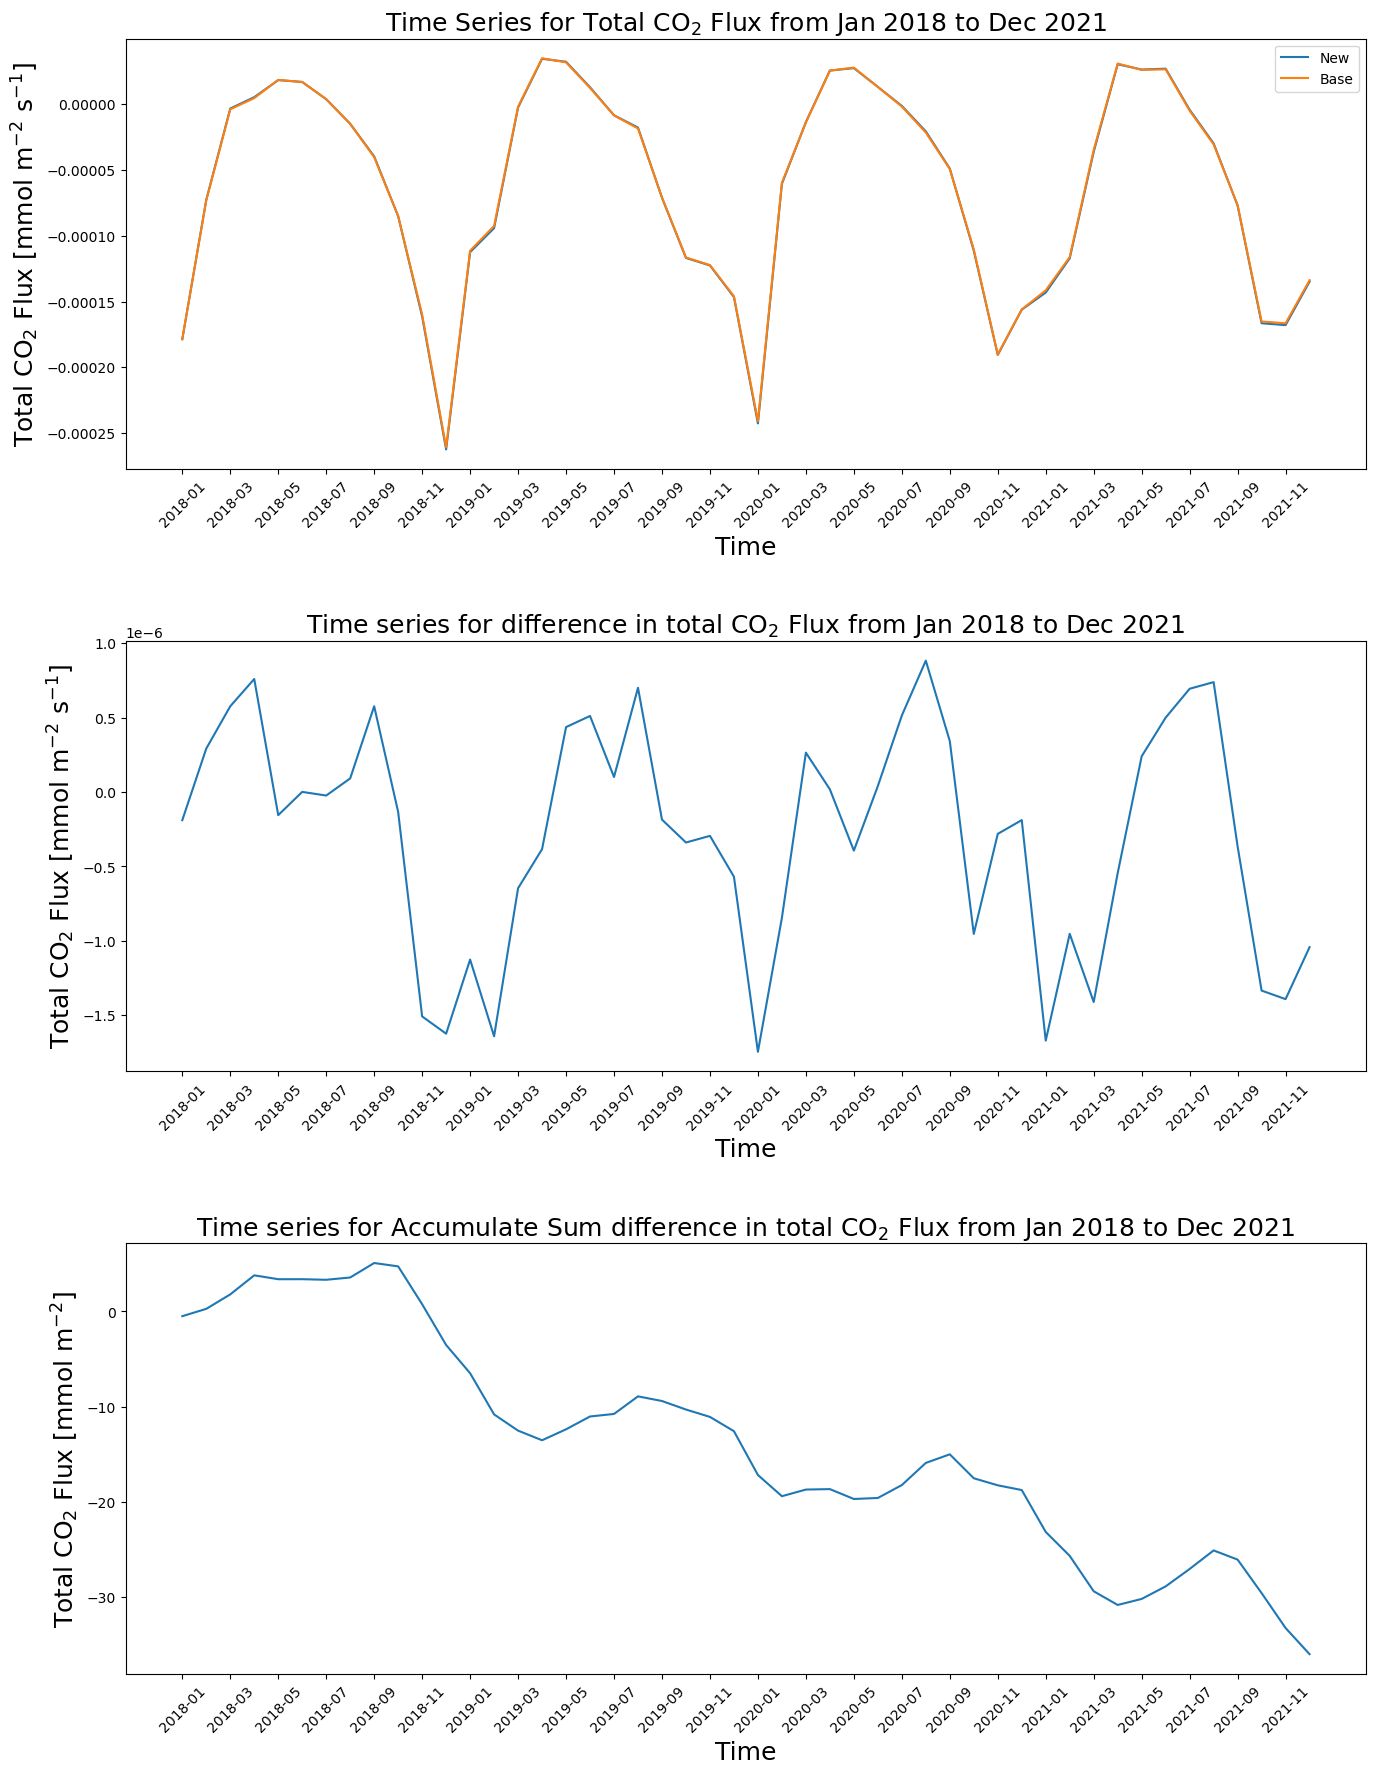

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(16, 15))
plt.subplots_adjust(hspace= 0.4)
fig.subplots_adjust(top=1.2) 
new_CO2_flux.plot(ax=axs[0], x = 'time', label = "New")
base_CO2_flux.plot(ax=axs[0], x = 'time', label = "Base")
axs[0].set_title(f'Time Series for Total CO$_2$ Flux from Jan 2018 to Dec 2021', fontsize=18)
axs[0].set_xlabel('Time', fontsize=18)
axs[0].set_ylabel('Total CO$_2$ Flux [mmol m$^{-2}$ s$^{-1}$]', fontsize=18)
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)
displayed_time_index = time_values[::2]
axs[0].set_xticks(displayed_time_index)


diff = new_CO2_flux - base_CO2_flux
diff.plot(ax=axs[1])
axs[1].set_title(f'Time series for difference in total CO$_2$ Flux from Jan 2018 to Dec 2021', fontsize=18)
axs[1].set_xlabel('Time', fontsize=18)
axs[1].set_ylabel('Total CO$_2$ Flux [mmol m$^{-2}$ s$^{-1}$]', fontsize=18)
axs[1].tick_params(axis='x', rotation=45)
displayed_time_index = time_values[::2]
axs[1].set_xticks(displayed_time_index)

diff_scale = diff * 86400 * 30.5
diff_cumsum = diff_scale.cumsum(dim='time')
diff_cumsum.plot(ax=axs[2])
displayed_time_index = time_values[::2]
axs[2].set_xticks(displayed_time_index)
axs[2].set_xlabel('Time', fontsize=18)
axs[2].set_ylabel('Total CO$_2$ Flux [mmol m$^{-2}$]', fontsize=18)
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_title(f'Time series for Accumulate Sum difference in total CO$_2$ Flux from Jan 2018 to Dec 2021', fontsize=18)